 Data Collection, Exploration, and Preprocessing

##  1. Data Collection:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install rasterio matplotlib scikit-learn opencv-python

In [ ]:
import os
import cv2
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

using open datasets such as the EuroSat Dataset MS

In [ ]:
final_dataset_path = "/content/drive/MyDrive/DEPI/Processed_Data"

In [ ]:
os.makedirs(final_dataset_path, exist_ok=True)

In [ ]:
dataset_path = "https://zenodo.org/records/7711810/files/EuroSAT_MS.zip?download=1"
Data_path='/content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS'

In [ ]:
import zipfile
import requests

def download_eurosat(destination=Data_path):
    os.makedirs(destination, exist_ok=True)
    url = dataset_path
    zip_path = os.path.join(destination, 'EuroSAT.zip')

    print("[INFO] Downloading EuroSAT RGB dataset...")
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(zip_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

    print("[INFO] Extracting ZIP file...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination)

    os.remove(zip_path)
    print("[INFO] Dataset ready at:", destination)

In [ ]:
download_eurosat()

[INFO] Downloading EuroSAT RGB dataset...


KeyboardInterrupt: 

In [ ]:
def count_images_in_folders(base_path):
    counts = {}
    for root, dirs, files in os.walk(base_path):
        if len(files) > 0:
            folder_name = os.path.basename(root)
            image_count = sum(1 for f in files if f.lower().endswith(('.tif','.tiff')))
            counts[folder_name] = image_count
    return counts


In [ ]:
count_images_in_folders(Data_path)

{'Forest': 3000,
 'River': 2500,
 'Highway': 2500,
 'AnnualCrop': 3000,
 'SeaLake': 3000,
 'HerbaceousVegetation': 3000,
 'Industrial': 2500,
 'Residential': 3000,
 'PermanentCrop': 2500,
 'Pasture': 2000}

In [ ]:

counts = count_images_in_folders(Data_path)

print("Total images:", sum(counts.values()))

Total images: 27000


In [ ]:
IMAGE_SIZE = (64, 64)

'''
    "B01 - Aerosols",
    "B02 - Blue",
    "B03 - Green",
    "B04 - Red",
    "B05 - Red edge 1",
    "B06 - Red edge 2",
    "B07 - Red edge 3",
    "B08 - NIR",
    "B08A - Red edge 4",
    "B09 - Water vapor",
    "B10 - Cirrus",
    "B11 - SWIR 1",
    "B12 - SWIR 2"
'''

BANDS = [1, 2, 3, 7]

Ensure the data includes multispectral images that capture various spectral bands (Red, Green, Blue, Near Infrared, etc.).

In [ ]:
sample_image_path = None

for root, dirs, files in os.walk(Data_path):
    for file in files:
        if file.endswith(".tif"):
            sample_image_path = os.path.join(root, file)
            break
    if sample_image_path:
        break

if sample_image_path:
    with rasterio.open(sample_image_path) as src:
        num_bands = src.count
        print(f"Sample Image: {sample_image_path}")
        print(f" Number of Spectral Bands: {num_bands}")
else:
    print("No images found in the dataset!")

Sample Image: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/Forest/Forest_2103.tif
 Number of Spectral Bands: 13


##  2. Data Exploration:

Load & Display an Image & Load a sample image and check its properties.

In [ ]:
print(os.listdir(Data_path))

['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']


In [ ]:
Data_path='/content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS'

In [ ]:
print(os.listdir(Data_path))

['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']


In [ ]:
land_types =['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']

In [ ]:
selected_images = {}

# Go to land type folders and pick one image
for land_type in os.listdir(Data_path):
    land_type_path = os.path.join(Data_path, land_type)
    if os.path.isdir(land_type_path):
        for filename in os.listdir(land_type_path):
            if filename.endswith(".tif"):
                selected_images[land_type] = os.path.join(land_type_path, filename)
                break

for land_type, image_path in selected_images.items():
    print(f"Selected {land_type}: {image_path}")


example_land_type = list(selected_images.keys())[0]
example_image_path = selected_images[example_land_type]

with rasterio.open(example_image_path) as src:
    image = src.read()

print(f"Loaded {example_land_type} image with shape: {image.shape}")


Selected Forest: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/Forest/Forest_2103.tif
Selected River: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/River/River_1261.tif
Selected Highway: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/Highway/Highway_2244.tif
Selected AnnualCrop: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/AnnualCrop/AnnualCrop_1409.tif
Selected SeaLake: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/SeaLake/SeaLake_2293.tif
Selected HerbaceousVegetation: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/HerbaceousVegetation/HerbaceousVegetation_2930.tif
Selected Industrial: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/Industrial/Industrial_2422.tif
Selected Residential: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/Residential/Residential_501.tif
Selected PermanentCrop: /content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/PermanentCrop/PermanentCrop_2269.tif
Selected Pasture: /content/drive/MyDrive/DEPI/Original_Data

 Perform exploratory data analysis (EDA) to understand the composition of the images, including the number of bands and their relevance to land type classification.

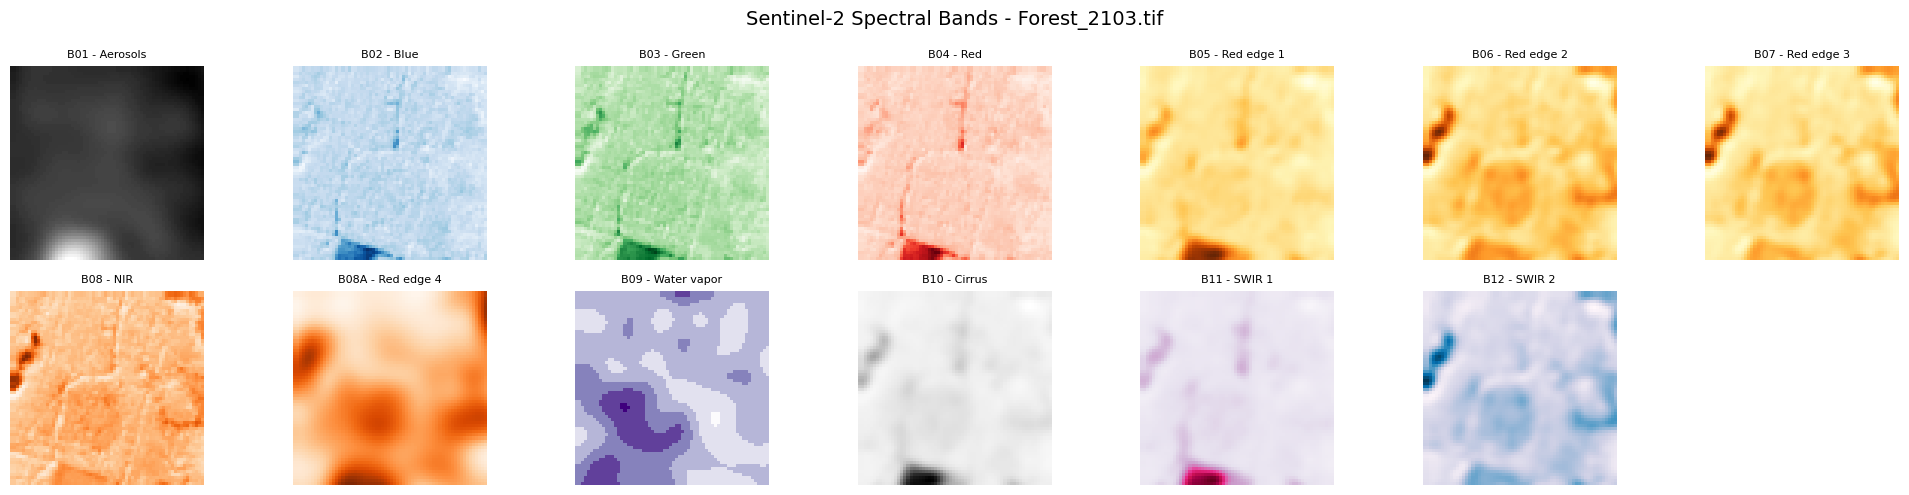

In [ ]:

# Sentinel-2 band names
BAND_LABELS = [
    "B01 - Aerosols",
    "B02 - Blue",
    "B03 - Green",
    "B04 - Red",
    "B05 - Red edge 1",
    "B06 - Red edge 2",
    "B07 - Red edge 3",
    "B08 - NIR",
    "B08A - Red edge 4",
    "B09 - Water vapor",
    "B10 - Cirrus",
    "B11 - SWIR 1",
    "B12 - SWIR 2"
]

# Colormap per band based on wavelength
BAND_COLORS = [
    'gray',     # B01 - Aerosols
    'Blues',    # B02 - Blue
    'Greens',   # B03 - Green
    'Reds',     # B04 - Red
    'YlOrBr',   # B05 - Red edge 1
    'YlOrBr',   # B06 - Red edge 2
    'YlOrBr',   # B07 - Red edge 3
    'Oranges',  # B08 - NIR
    'Oranges',  # B08A - Red edge 4
    'Purples',  # B09 - Water vapor
    'Greys',    # B10 - Cirrus
    'PuRd',     # B11 - SWIR 1
    'PuBu',     # B12 - SWIR 2
]

def plot_bands(image, filename):
    num_bands = image.shape[0]
    plt.figure(figsize=(20, 5))
    for i in range(num_bands):
        plt.subplot(2, (num_bands + 1) // 2, i + 1)

        band = image[i].astype(np.float32)
        band = (band - band.min()) / (band.max() - band.min() + 1e-6)

        cmap = BAND_COLORS[i] if i < len(BAND_COLORS) else 'gray'
        label = BAND_LABELS[i] if i < len(BAND_LABELS) else f"Band {i + 1}"

        plt.imshow(band, cmap=cmap)
        plt.title(label, fontsize=8)
        plt.axis("off")

    plt.suptitle(f"Sentinel-2 Spectral Bands - {filename}", fontsize=14)
    plt.tight_layout()
    plt.show()

plot_bands(image, os.path.basename(example_image_path))


Inspect the dataset for potential issues, such as imbalanced classes, missing data, or mislabeled images

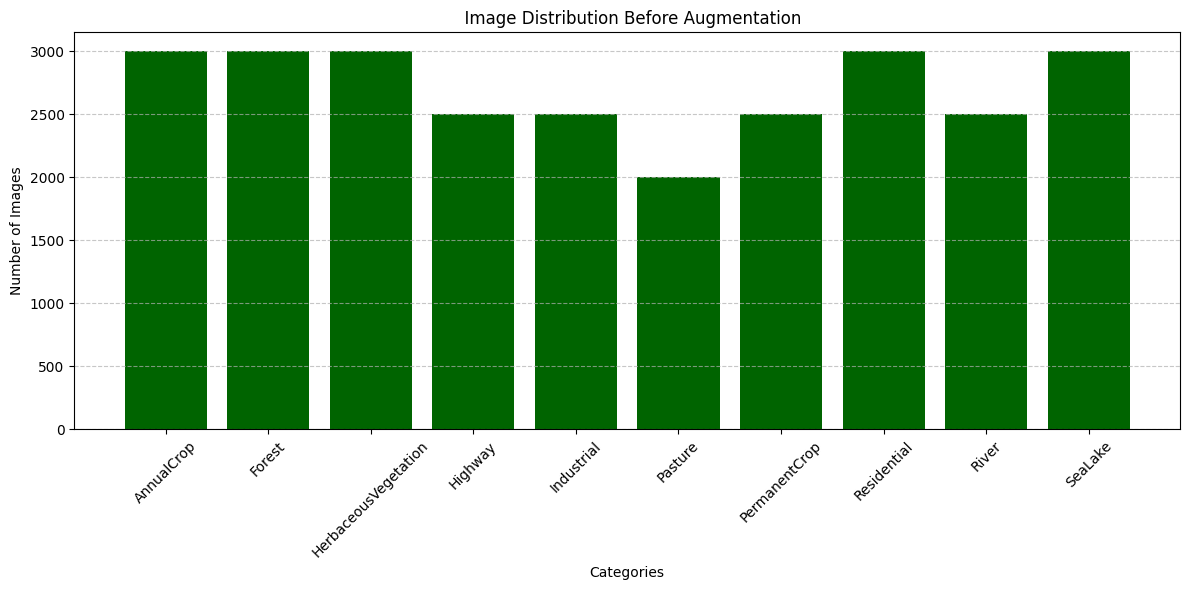

In [ ]:
#  Count Images  (Before Augmentation)
categories = sorted(os.listdir(Data_path))
category_counts = {}

for category in categories:
    category_folder = os.path.join(Data_path, category)
    if os.path.isdir(category_folder):
        category_counts[category] = len([file for file in os.listdir(category_folder) if file.endswith(".tif")])


category_names = list(category_counts.keys())
image_counts = list(category_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category_names, image_counts, color="darkgreen")
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("  Image Distribution Before Augmentation")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


 Function to process a single image from TIFF


In [ ]:
def process_tiff_image(image_path, bands=range(1, 13)):  # Default: All bands (B01 to B12)
    with rasterio.open(image_path) as src:
        img = src.read(list(bands)).astype(np.float32)
        img = np.transpose(img, (1, 2, 0))
        img = (img - img.min()) / (img.max() - img.min())
    return img

def process_rgb_image(image_path, bands=[4, 3, 2]):
    with rasterio.open(image_path) as src:
        img = src.read(bands).astype(np.float32)
        img = np.transpose(img, (1, 2, 0))
        img = (img - img.min()) / (img.max() - img.min())
    return img



Visualize sample images from different land types (e.g., agricultural land, urban, water,
desert) and examine their spectral signatures.

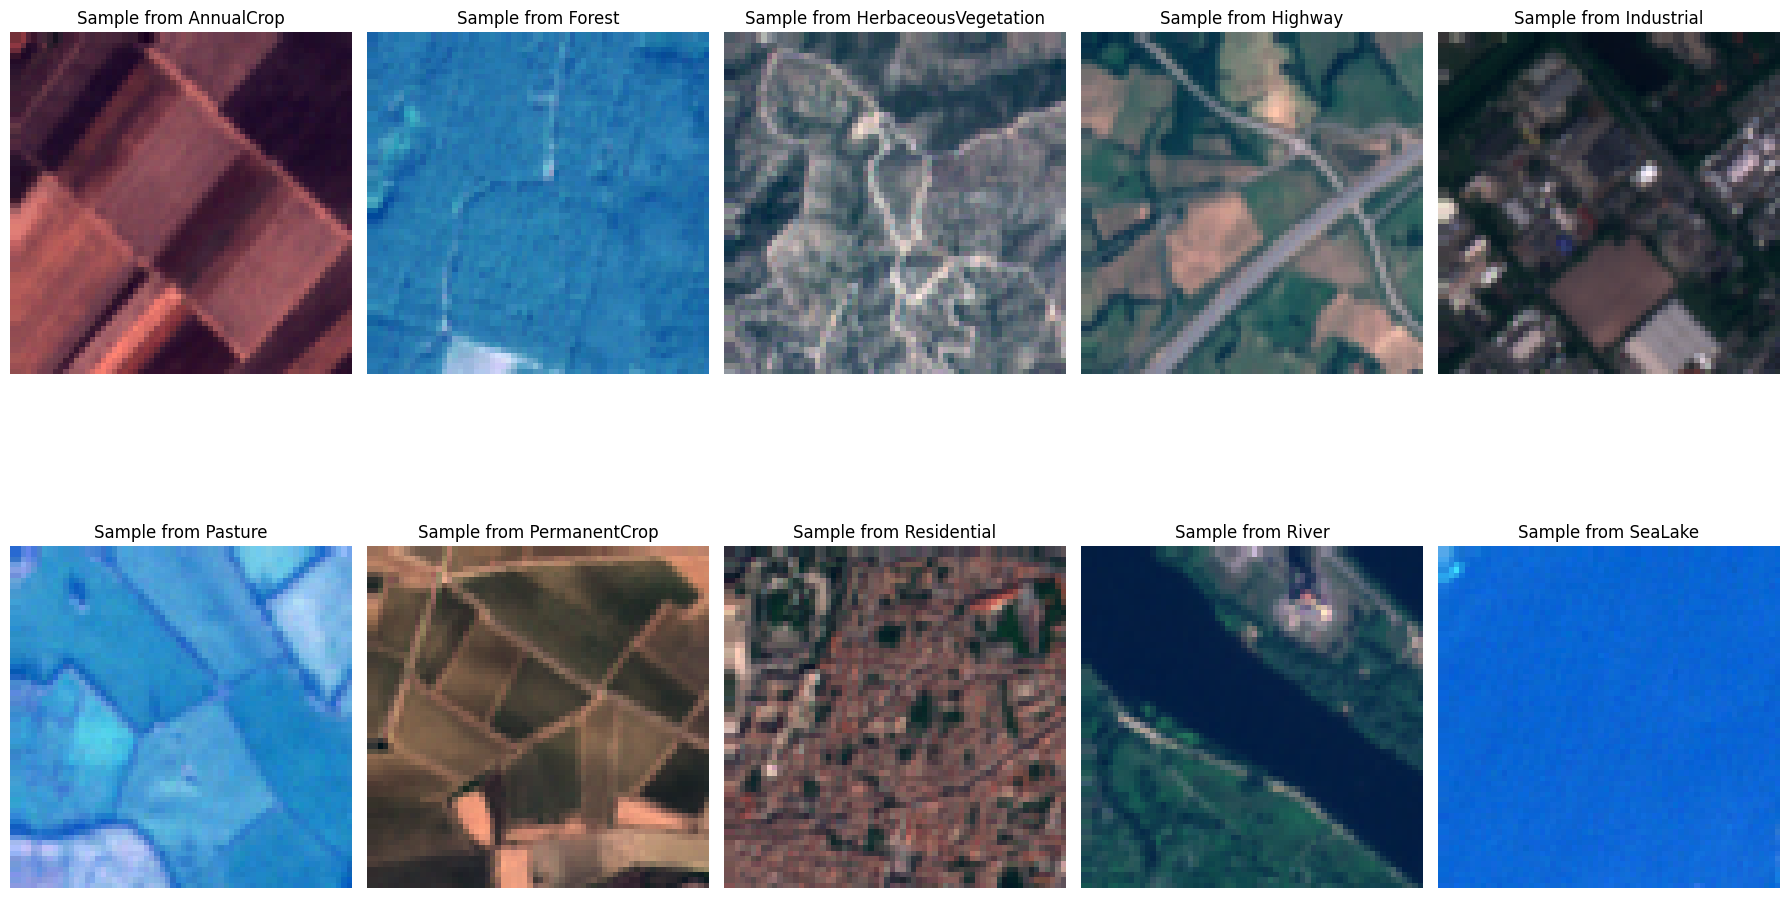

In [ ]:
def visualize_sample_images(data_path):
    categories = sorted(os.listdir(Data_path))

    plt.figure(figsize=(18, 12))

    for i, category in enumerate(categories):
        category_path = os.path.join(data_path, category)
        sample_file = next(f for f in os.listdir(category_path) if f.lower().endswith(".tif"))
        sample_image_path = os.path.join(category_path, sample_file)

        img = process_rgb_image(sample_image_path)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Sample from {category}")

    plt.tight_layout()
    plt.show()

# Usage example
visualize_sample_images(Data_path)

##  3. Preprocessing and Feature Engineering:

 Define Image Processing & Augmentation

In [ ]:
!pip install albumentations

In [ ]:


import albumentations as A

augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    # A.RandomRotate90( ),
    A.RandomBrightnessContrast(p=0.2),
])

Test the Processing & Augmentation

In [ ]:
sample_path = os.path.join(Data_path   , sorted(os.listdir(Data_path ))[0])
print(sample_path)

/content/drive/MyDrive/DEPI/Original_Data/EuroSAT_MS/AnnualCrop


In [ ]:

sample_file = next(f for f in os.listdir(sample_path) if f.lower().endswith(".tif"))
sample_image_path = os.path.join(sample_path, sample_file)

processed_image = process_rgb_image(sample_image_path)
print(f'The Img Shape = {processed_image.shape}')

The Img Shape = (64, 64, 3)


 Apply augmentation

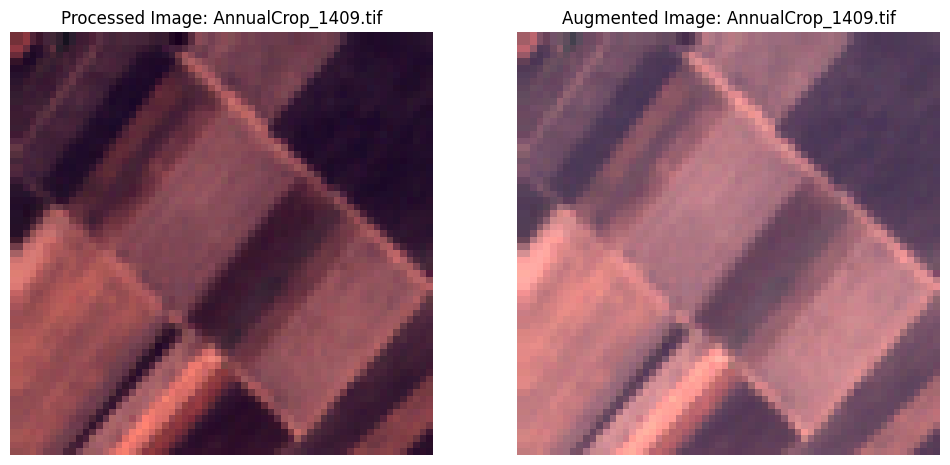

In [ ]:
augmented = augmentation(image=processed_image)["image"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(processed_image[:, :, :3])
plt.axis("off")
plt.title(f"Processed Image: {sample_file}")

plt.subplot(1, 2, 2)
plt.imshow(augmented[:, :, :3])
plt.axis("off")
plt.title(f"Augmented Image: {sample_file}")
plt.show()

**Compute NDVI for one Image**

Consider calculating additional features such as vegetation indices (e.g., NDVI – Normalized Difference Vegetation Index) for better differentiation between land types like trees and agriculture.

In [ ]:
def compute_ndvi(image, nir_band=3, red_band=2):  # Computes NDVI using Near-Infrared (B8) and Red (B4) bands.
    nir = image[:, :, nir_band].astype(float)
    red = image[:, :, red_band].astype(float)
    ndvi = (nir - red) / (nir + red + 1e-5)
    return ndvi

Apply NDVI

In [ ]:
sample_path = os.path.join(Data_path, sorted(os.listdir(Data_path))[0])

sample_file = next(f for f in os.listdir(sample_path) if f.lower().endswith(".tif"))
sample_image_path = os.path.join(sample_path, sample_file)

processed_image = process_tiff_image(sample_image_path)

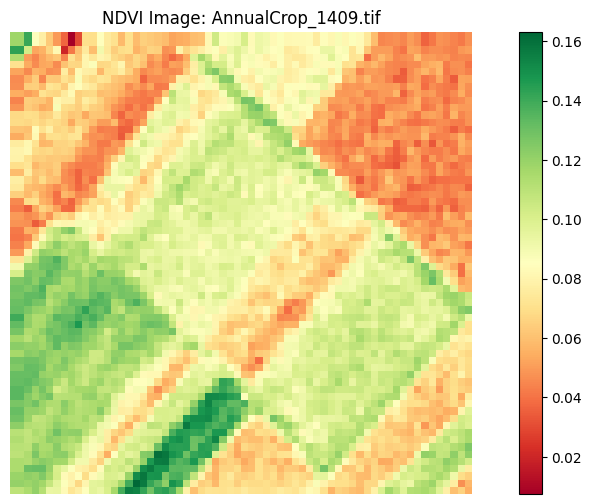

In [ ]:
ndvi = compute_ndvi(image=processed_image)

plt.figure(figsize=(12, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.axis("off")
plt.title(f"NDVI Image: {sample_file}")
plt.show()


##  4. Exploratory Data Analysis (EDA):

In [ ]:
def visualize_land_type_and_spectrals(data_path, land_types, bands=range(1, 13)):
    plt.figure(figsize=(16, 5 * len(land_types)))

    for i, land_type in enumerate(land_types):
        path = os.path.join(data_path, land_type)
        file = next(f for f in os.listdir(path) if f.lower().endswith(".tif"))
        img = process_rgb_image(os.path.join(path, file), bands)

        rgb = (img[:, :, [3, 2, 1]] - img.min()) / (img.max() - img.min())
        spectral = img.mean(axis=(0, 1))

        plt.subplot(len(land_types), 2, 2 * i + 1)
        plt.imshow(rgb)
        plt.axis("off")
        plt.title(f"{land_type} - RGB")

        plt.subplot(len(land_types), 2, 2 * i + 2)
        plt.plot(spectral, marker='o')
        plt.xticks(range(len(bands)), [BAND_LABELS[b - 1] for b in bands], rotation=45)
        plt.title(f"{land_type} - Spectral Signature")

    plt.tight_layout()
    plt.show()


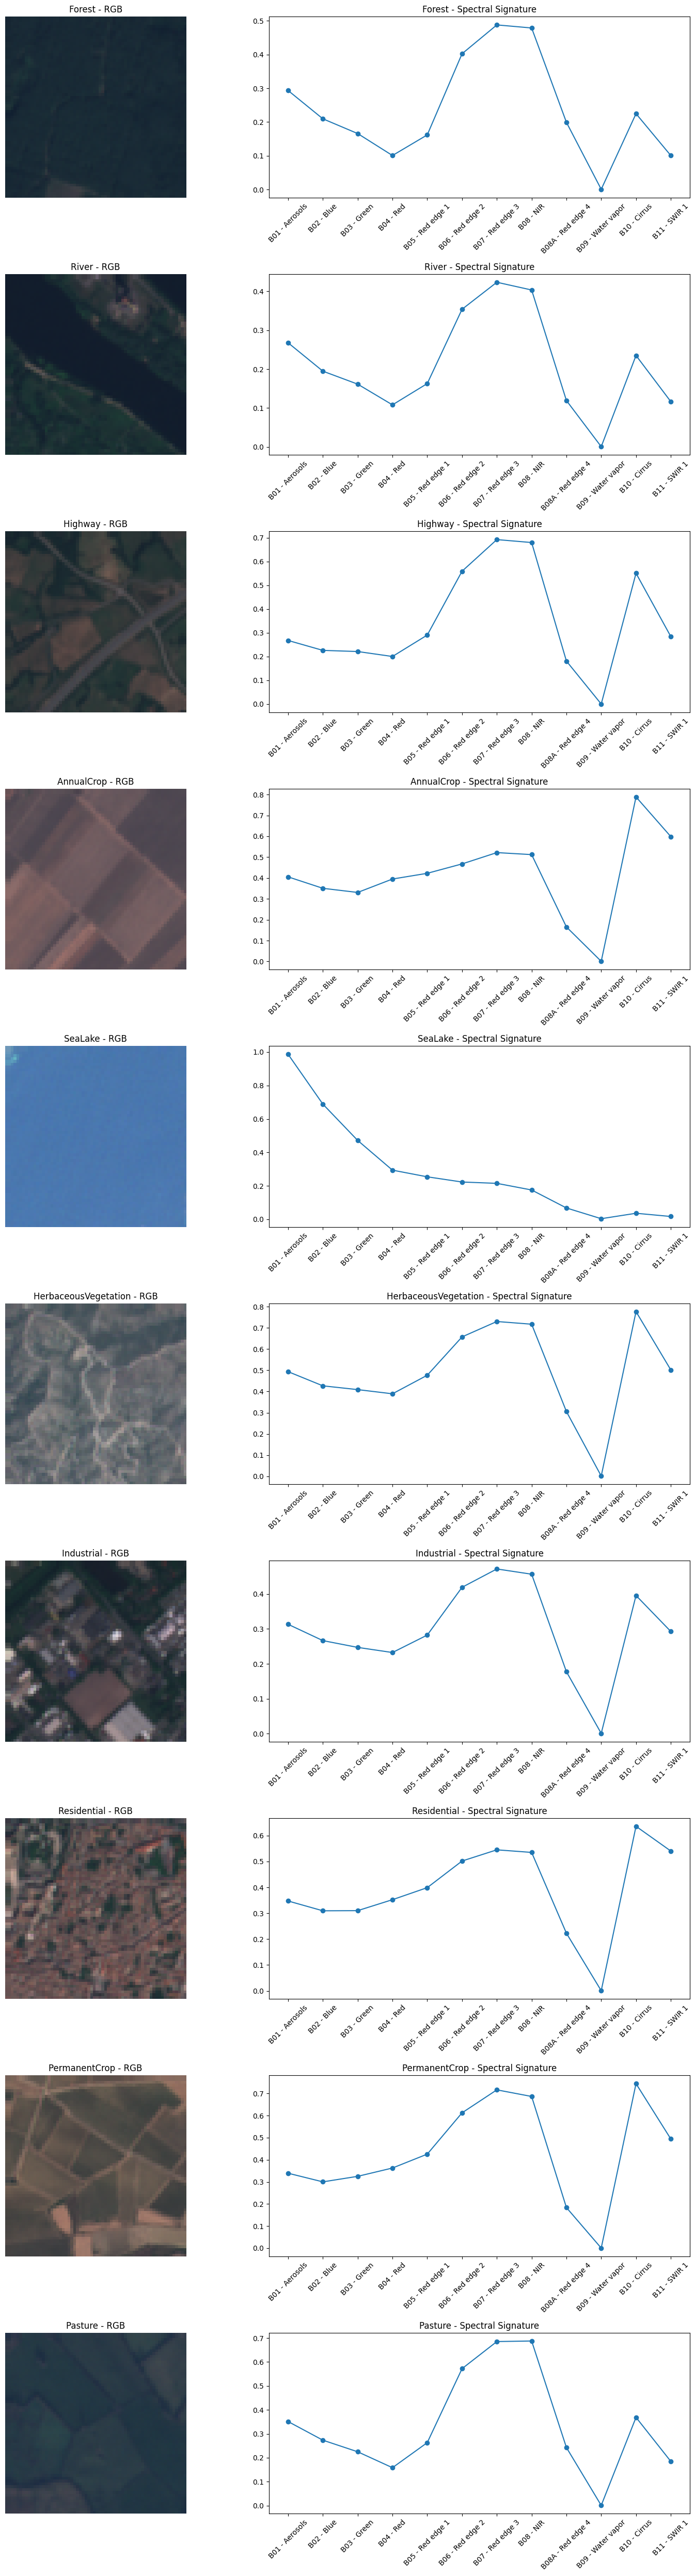

In [ ]:
visualize_land_type_and_spectrals(Data_path, land_types)

## Save The processed Images

In [ ]:
# import shutil

# def clear_folder(directory_path):
#     if os.path.exists(directory_path):
#         shutil.rmtree(directory_path)
#         print(f"Folder {directory_path} is cleared.")
#     else:
#         print(f"Folder {directory_path} does not exist.")

# clear_folder(final_dataset_path)

Folder /content/drive/My Drive/DEPI/Data/Processed_Data is cleared.


In [ ]:
import os
import numpy as np
import rasterio

def save_all_processed_images(data_path, final_dataset_path):
    types = ["RGB", "RGB_NIR", "NDVI"]

    # Create type folders
    for t in types:
        type_path = os.path.join(final_dataset_path, t)
        os.makedirs(type_path, exist_ok=True)
        print(f"Folder: {type_path} is created.")

    # Categories to skip
    skip_categories = ["AnnualCrop", "HerbaceousVegetation", "Forest", "SeaLake",'Highway', 'Industrial', 'Pasture', 'PermanentCrop']

    # Loop through categories
    for category in sorted(os.listdir(data_path)):

        if category in skip_categories:
            print(f"Skipping category: {category}")
            continue

        category_path = os.path.join(data_path, category)
        if not os.path.isdir(category_path):
            continue

        print(f"\nProcessing category: {category}")

        # Loop through TIFF files
        for file in os.listdir(category_path):
            if not file.lower().endswith(".tif"):
                continue

            file_path = os.path.join(category_path, file)
            base_name = os.path.splitext(file)[0]

            try:
                # Process images
                rgb = process_rgb_image(file_path).astype(np.float32)
                rgb_nir = process_tiff_image(file_path, bands=[4, 3, 2, 8]).astype(np.float32)
                ndvi = compute_ndvi(image=rgb_nir, nir_band=3, red_band=0).astype(np.float32)

                # Augmentation
                rgb_aug = augmentation(image=(rgb * 255).astype(np.uint8))['image']
                rgb_aug = rgb_aug.astype(np.float32) / 255.0

                # Prepare category subfolders
                for t in types:
                    cat_dir = os.path.join(final_dataset_path, t, category)
                    os.makedirs(cat_dir, exist_ok=True)

                # Save arrays
                np.save(os.path.join(final_dataset_path, "RGB", category, f"{base_name}.npy"), rgb)
                np.save(os.path.join(final_dataset_path, "RGB", category, f"{base_name}_aug.npy"), rgb_aug)
                np.save(os.path.join(final_dataset_path, "RGB_NIR", category, f"{base_name}.npy"), rgb_nir)
                np.save(os.path.join(final_dataset_path, "NDVI", category, f"{base_name}.npy"), ndvi)

                print(f"Processed and saved: {file}")

            except rasterio.errors.RasterioIOError:
                print(f"Skipped: {file} (cannot read or unsupported TIFF format)")
            except Exception as e:
                print(f"Error processing {file}: {e}")


In [ ]:
save_all_processed_images(data_path=Data_path, final_dataset_path="/content/drive/My Drive/DEPI/Data/Processed_Data")

Streaming output truncated to the last 5000 lines.
Processed and saved: Residential_1113.tif
Processed and saved: Residential_1675.tif
Processed and saved: Residential_2368.tif
Processed and saved: Residential_1661.tif
Processed and saved: Residential_1107.tif
Processed and saved: Residential_943.tif
Processed and saved: Residential_2426.tif
Processed and saved: Residential_2340.tif
Processed and saved: Residential_1649.tif
Processed and saved: Residential_1891.tif
Processed and saved: Residential_1885.tif
Processed and saved: Residential_2354.tif
Processed and saved: Residential_2432.tif
Processed and saved: Residential_994.tif
Processed and saved: Residential_758.tif
Processed and saved: Residential_980.tif
Processed and saved: Residential_770.tif
Processed and saved: Residential_1852.tif
Processed and saved: Residential_2383.tif
Processed and saved: Residential_2397.tif
Processed and saved: Residential_1846.tif
Processed and saved: Residential_764.tif
Processed and saved: Residentia

In [ ]:
count_images_in_folders("/content/drive/MyDrive/DEPI/Processed_Data")

{'AnnualCrop': 0,
 'Forest': 0,
 'HerbaceousVegetation': 0,
 'SeaLake': 0,
 'Highway': 0,
 'Industrial': 0,
 'Pasture': 0,
 'PermanentCrop': 0,
 'Residential': 0,
 'River': 0}

In [ ]:
# Found that sealake didn't added, so we will make a function to add it alone

In [ ]:
def process_sealake_images(data_path, final_dataset_path):
    types = ["RGB", "RGB_NIR", "NDVI"]

    for t in types:
        type_path = os.path.join(final_dataset_path, t)
        os.makedirs(type_path, exist_ok=True)
        print(f"Folder: {type_path} is created.")

    # Define the SeaLake category path
    category = 'SeaLake'
    category_path = os.path.join(data_path, category)

    if not os.path.isdir(category_path):
        print(f"Category {category} not found in the dataset. Please check your data path.")
        return

    print(f"\nProcessing category: {category}")

    for file in os.listdir(category_path):
        if not file.lower().endswith(".tif"):
            continue

        file_path = os.path.join(category_path, file)
        base_name = os.path.splitext(file)[0]

        # Process images for SeaLake category
        rgb = process_rgb_image(file_path).astype(np.float32)
        rgb_nir = process_tiff_image(file_path, bands=[4, 3, 2, 8]).astype(np.float32)
        ndvi = compute_ndvi(image=rgb_nir, nir_band=3, red_band=0).astype(np.float32)

        # Augmentation
        rgb_aug = augmentation(image=(rgb * 255).astype(np.uint8))['image']
        rgb_aug = rgb_aug.astype(np.float32) / 255.0

        # Prepare subfolders for saving
        for t in types:
            cat_dir = os.path.join(final_dataset_path, t, category)
            os.makedirs(cat_dir, exist_ok=True)

        # Save processed data as .npy
        np.save(os.path.join(final_dataset_path, "RGB", category, f"{base_name}.npy"), rgb)
        np.save(os.path.join(final_dataset_path, "RGB", category, f"{base_name}_aug.npy"), rgb_aug)
        np.save(os.path.join(final_dataset_path, "RGB_NIR", category, f"{base_name}.npy"), rgb_nir)
        np.save(os.path.join(final_dataset_path, "NDVI", category, f"{base_name}.npy"), ndvi)

        print(f"Processed and saved: {file}")

In [ ]:
print(os.listdir(Data_path))
Data_path='/content/drive/My Drive/DEPI/Data/Original_Data/EuroSAT_MS/'

['EuroSAT_MS', 'EuroSAT.zip']


In [ ]:
process_sealake_images(data_path=Data_path,final_dataset_path="/content/drive/My Drive/DEPI/Data/Processed_Data")

Folder: /content/drive/My Drive/DEPI/Data/Processed_Data/RGB is created.
Folder: /content/drive/My Drive/DEPI/Data/Processed_Data/RGB_NIR is created.
Folder: /content/drive/My Drive/DEPI/Data/Processed_Data/NDVI is created.

Processing category: SeaLake
Processed and saved: SeaLake_2293.tif
Processed and saved: SeaLake_1942.tif
Processed and saved: SeaLake_1771.tif
Processed and saved: SeaLake_2278.tif
Processed and saved: SeaLake_1017.tif
Processed and saved: SeaLake_1003.tif
Processed and saved: SeaLake_1765.tif
Processed and saved: SeaLake_2244.tif
Processed and saved: SeaLake_1995.tif
Processed and saved: SeaLake_2522.tif
Processed and saved: SeaLake_2536.tif
Processed and saved: SeaLake_1981.tif
Processed and saved: SeaLake_1759.tif
Processed and saved: SeaLake_2250.tif
Processed and saved: SeaLake_776.tif
Processed and saved: SeaLake_2907.tif
Processed and saved: SeaLake_762.tif
Processed and saved: SeaLake_2913.tif
Processed and saved: SeaLake_992.tif
Processed and saved: SeaLak

### ** Conclusion**
DONE:
-  Validated dataset integrity
-  Checked image quality & distributions
-  Confirmed the presence of **multispectral bands**
-  Displayed sample images from different categories
-  Preprocessed images (resize, normalize, augment)
-  Computed & visualized NDVI for vegetation analysis




In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/DEPI/Processed_Data"
print(os.listdir(data_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['RGB', 'RGB_NIR', 'NDVI']


In [ ]:
rgb_path='/content/drive/MyDrive/DEPI/Processed_Data/RGB'
rgb_nir_path = '/content/drive/MyDrive/DEPI/Processed_Data/RGB_NIR'
ndvi_path ='/content/drive/MyDrive/DEPI/Processed_Data/NDVI'

print("RGB shape:", os.listdir(rgb_path))
print("RGB + NIR shape:", os.listdir(rgb_nir_path))
print("NDVI shape:", os.listdir(ndvi_path))

RGB shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'SeaLake', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River']
RGB + NIR shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'SeaLake', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River']
NDVI shape: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'SeaLake', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River']


In [ ]:
def count_images_in_folders(root_path):
    for main_dir in os.listdir(root_path):
        main_dir_path = os.path.join(root_path, main_dir)
        if not os.path.isdir(main_dir_path):
            continue

        print(f"\n{main_dir} Folder:")
        total_images = 0

        for category in os.listdir(main_dir_path):
            category_path = os.path.join(main_dir_path, category)
            if not os.path.isdir(category_path):
                continue

            image_count = len([
                file for file in os.listdir(category_path)
            ])

            total_images += image_count
            print(f"-------->  {category}: {image_count} images")

        print(f"\n======>   Total in {main_dir}: {total_images} images")


In [ ]:
count_images_in_folders(data_path)


RGB Folder:
-------->  AnnualCrop: 5742 images
-------->  Forest: 5998 images
-------->  HerbaceousVegetation: 2548 images
-------->  SeaLake: 6000 images
-------->  Highway: 5000 images
-------->  Industrial: 5000 images
-------->  Pasture: 4000 images
-------->  PermanentCrop: 4350 images
-------->  Residential: 6000 images
-------->  River: 4947 images

======>   Total in RGB: 49585 images

RGB_NIR Folder:
-------->  AnnualCrop: 2871 images
-------->  Forest: 2999 images
-------->  HerbaceousVegetation: 1273 images
-------->  SeaLake: 3000 images
-------->  Highway: 2500 images
-------->  Industrial: 2500 images
-------->  Pasture: 2000 images
-------->  PermanentCrop: 2175 images
-------->  Residential: 3000 images
-------->  River: 2474 images

======>   Total in RGB_NIR: 24792 images

NDVI Folder:
-------->  AnnualCrop: 2871 images
-------->  Forest: 2999 images
-------->  HerbaceousVegetation: 1274 images
-------->  SeaLake: 3000 images
-------->  Highway: 2500 images
-------->

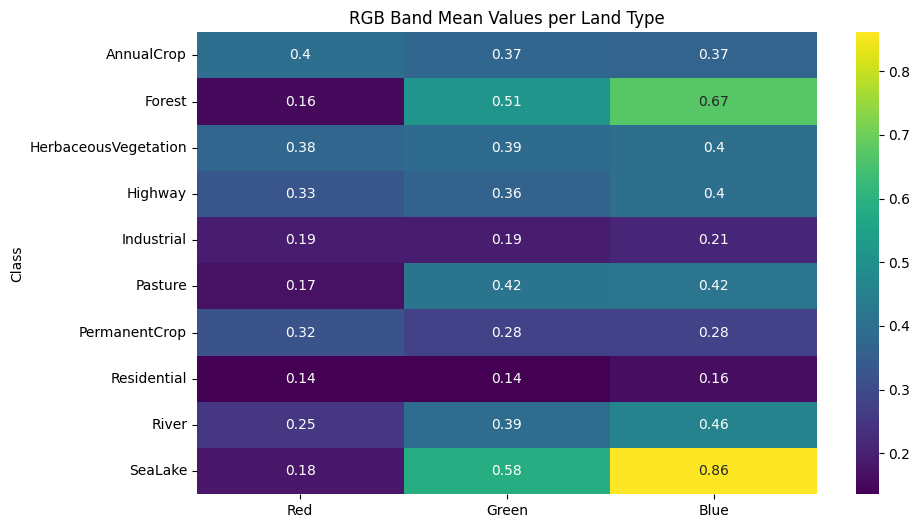

In [ ]:
def visualize_rgb_correlation(base_dir=rgb_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='viridis')
    plt.title("RGB Band Mean Values per Land Type")
    plt.show()
visualize_rgb_correlation()

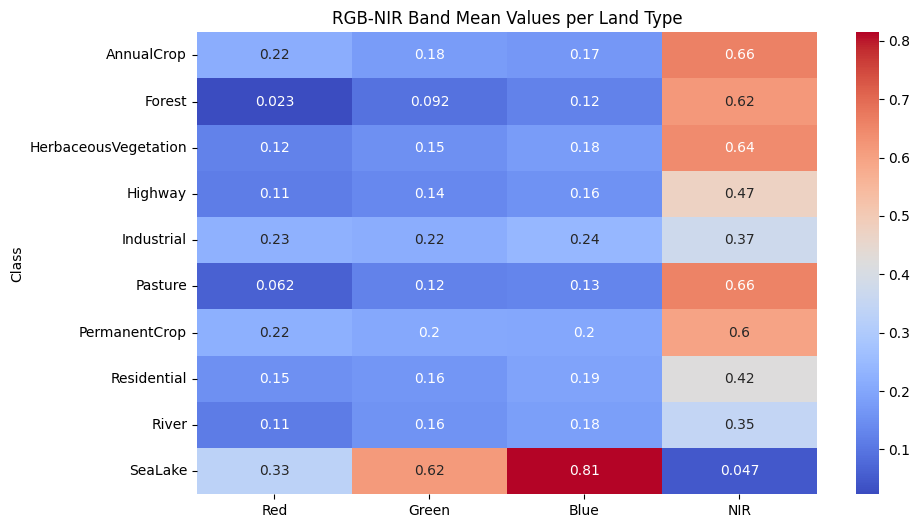

In [ ]:
def visualize_rgb_nir_correlation(base_dir=rgb_nir_path, n_samples=10):
    bands = ['Red', 'Green', 'Blue', 'NIR']
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            means = img.mean(axis=(0, 1))
            data.append(dict(zip(bands, means)) | {'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='coolwarm')
    plt.title("RGB-NIR Band Mean Values per Land Type")
    plt.show()
visualize_rgb_nir_correlation()

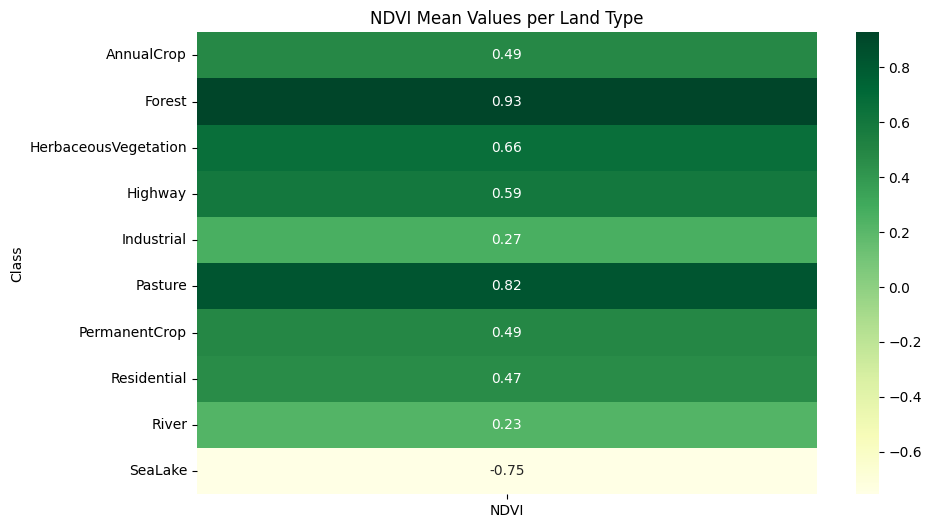

In [ ]:
def visualize_ndvi_correlation(base_dir=ndvi_path, n_samples=10):
    land_types = sorted(os.listdir(base_dir))
    data = []

    for land_type in land_types:
        class_path = os.path.join(base_dir, land_type)
        files = [f for f in os.listdir(class_path) if f.endswith('.npy')][:n_samples]

        for file in files:
            img = np.load(os.path.join(class_path, file))
            if img.ndim == 3:
                img = img.squeeze()
            mean_ndvi = img.mean()
            data.append({'NDVI': mean_ndvi, 'Class': land_type})

    df = pd.DataFrame(data)
    df_grouped = df.groupby("Class").mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_grouped, annot=True, cmap='YlGn')
    plt.title("NDVI Mean Values per Land Type")
    plt.show()
visualize_ndvi_correlation()